In [1]:
from google.colab import drive
import sys
import os

# Montar Google Drive
drive.mount('/content/drive')

# Definir rutas base y repo
BASE_PATH = '/content/drive/MyDrive/Tesis'
REPO_NAME = 'Tesis_NN'
REPO_PATH = os.path.join(BASE_PATH, REPO_NAME)

# Agregar repo al path de Python para imports
if REPO_PATH not in sys.path:
    sys.path.append(REPO_PATH)

# Cambiar directorio actual al repo (para comandos git)
os.chdir(REPO_PATH)

print(f"Drive montado. Carpeta repo seteada en: {REPO_PATH}")

Mounted at /content/drive
Drive montado. Carpeta repo seteada en: /content/drive/MyDrive/Tesis/Tesis_NN


In [2]:
from google.colab import files
%cd /content/drive/MyDrive/Tesis/Tesis_NN
!pip install -r requirements.txt

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.9 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement pywin32==310 (from versions: none)
ERROR: No matching distribution found for pywin32==310


In [3]:
!pip install webdataset

  Using cached braceexpand-0.1.7-py2.py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 4.4 MB/s eta 0:00:00


In [16]:
# ───────────────────────────────────────────────────────────────────────────────
# 📦 Standard Library Imports
# ───────────────────────────────────────────────────────────────────────────────
import os
import sys
import time
import csv
import json
from pathlib import Path

# ───────────────────────────────────────────────────────────────────────────────
# 📚 Scientific & Data Libraries
# ───────────────────────────────────────────────────────────────────────────────
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────────────────
# 🌍 Third-Party Library Imports (PyTorch)
# ───────────────────────────────────────────────────────────────────────────────
import torch
import torch.optim as optim

# ───────────────────────────────────────────────────────────────────────────────
# 🧩 Custom Project Modules
# ───────────────────────────────────────────────────────────────────────────────
# Add custom project folder to system path to enable local module imports
# Add custom project folder to system path to enable local module imports
sys.path.append('C:/Users/nnobi/Desktop/FIUBA/Tesis/Project')

from project_package.utils import train_common_routines as tcr
from project_package.conv_net.ConvNet_model import SRCNN_small
from project_package.dataset_manager.webdataset_dataset import PtWebDataset

# ───────────────────────────────────────────────────────────────────────────────
# 🔧 Configuration
# ───────────────────────────────────────────────────────────────────────────────
model_selection = 'SRCNN_small'
epochs = 200
lr = 1e-5
batch_size = 32

# ───────────────────────────────────────────────────────────────────────────────
# 📁 Paths Setup
# ───────────────────────────────────────────────────────────────────────────────
script_dir = os.getcwd()
project_dir = os.path.abspath(os.path.join(script_dir, '..'))

dataset = 'dataset_test1' # Select Dataset
dataset_folder = os.path.join('/content',dataset)
metadata_path = os.path.join(dataset_folder, 'metadata.json')

with open(metadata_path, "r") as f:
    metadata = json.load(f)

train_samples = metadata["splits"]["train"]["num_samples"]
val_samples = metadata["splits"]["val"]["num_samples"]
test_samples = metadata["splits"]["test"]["num_samples"]

# Results folder and files
results_folder = os.path.join(project_dir, 'results', model_selection)
os.makedirs(results_folder, exist_ok=True)

loss_png_file = os.path.join(results_folder, f"loss_lr={lr}_batch_size={batch_size}_model={model_selection}.png")
psnr_png_file = os.path.join(results_folder, f"psnr_lr={lr}_batch_size={batch_size}_model={model_selection}.png")
final_model_pth_file = os.path.join(results_folder, f"model_lr={lr}_batch_size={batch_size}_model={model_selection}.pth")
file_training_losses = os.path.join(results_folder, f"training_losses_lr={lr}_batch_size={batch_size}_model={model_selection}.csv")


Device: cuda
The model:
SRCNN_small(
  (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4), padding_mode=replicate)
  (relu1): ReLU(inplace=True)
  (conv2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=replicate)
  (relu2): ReLU(inplace=True)
  (conv3): Conv2d(32, 3, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), padding_mode=replicate)
)
Total Parameters: 36,483
Trainable Parameters: 36,483
Model training to be done in only one GPU!

Epoch 1 of 200
Train PSNR: 12.487
Val PSNR: 13.546
Checkpoint saved at epoch 0

Epoch 2 of 200
Train PSNR: 12.499
Val PSNR: 13.555

Epoch 3 of 200
Train PSNR: 12.512
Val PSNR: 13.565

Epoch 4 of 200
Train PSNR: 12.525
Val PSNR: 13.574

Epoch 5 of 200
Train PSNR: 12.539
Val PSNR: 13.583

Epoch 6 of 200
Train PSNR: 12.554
Val PSNR: 13.594
Checkpoint saved at epoch 5

Epoch 7 of 200
Train PSNR: 12.571
Val PSNR: 13.607

Epoch 8 of 200
Train PSNR: 12.591
Val PSNR: 13.624

Epoch 9 of 200
Train PSNR: 12.

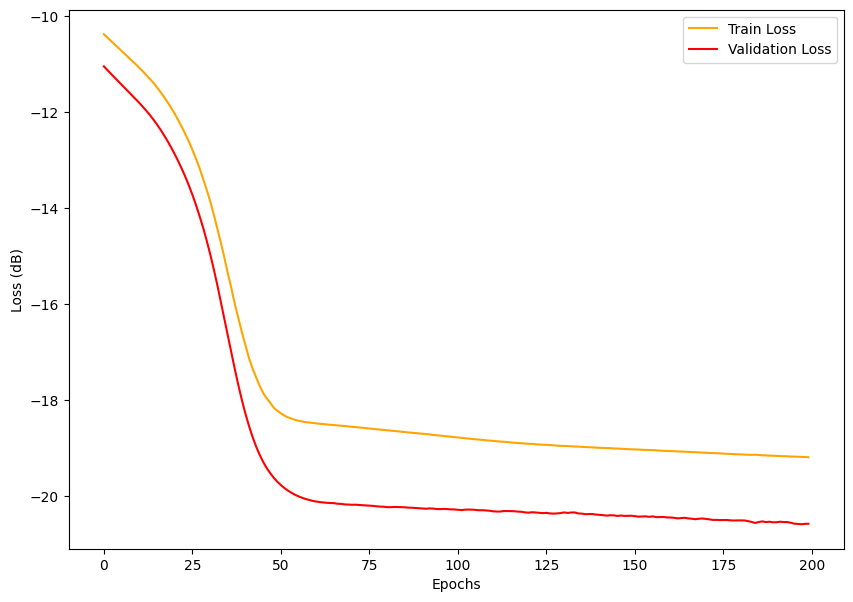

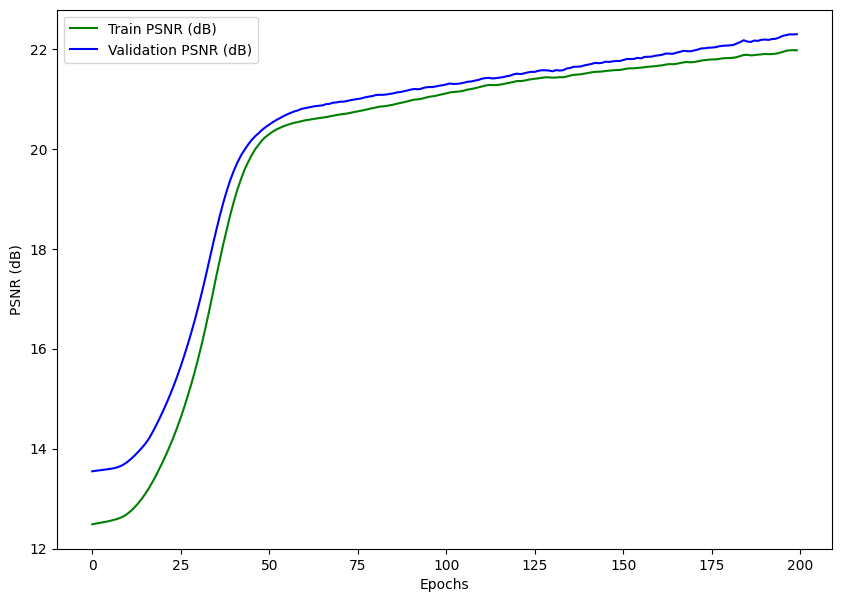


💾 Saving model...


In [18]:
# ───────────────────────────────────────────────────────────────────────────────
# 🚀 Training Pipeline
# ───────────────────────────────────────────────────────────────────────────────
if __name__ == "__main__":

    # 🧠 Model Initialization
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Device:", device)

    torch.backends.cudnn.benchmark = True # Enables cuDNN auto-tuner to find the best algorithm for fixed input sizes (improves performance)

    model = SRCNN_small().to(device)
    print("The model:")
    print(model)

    model.count_parameters()
    print(f"Total Parameters: {model.total_params:,}")
    print(f"Trainable Parameters: {model.trainable_params:,}")

    model = tcr.multi_GPU_training(model)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # 📊 Dataset and DataLoaders
    # Tune num_workers for dataloaders and buffersize
    dataset_train = PtWebDataset(os.path.join(dataset_folder,'train-*.tar'), length=train_samples, batch_size=batch_size, shuffle_buffer=5 * batch_size)
    dataset_val = PtWebDataset(os.path.join(dataset_folder,'val-*.tar'), length=val_samples, batch_size=batch_size, shuffle_buffer=5 * batch_size)
    dataset_test = PtWebDataset(os.path.join(dataset_folder,'test.tar'), length=test_samples, batch_size=batch_size, shuffle_buffer=5 * batch_size)

    dataloader_train = dataset_train.get_dataloader(num_workers=1)
    dataloader_val = dataset_val.get_dataloader(num_workers=1)
    dataloader_test = dataset_test.get_dataloader(num_workers=1)

    # 🏋️ Training Loop
    train_loss, val_loss = [], []
    train_psnr, val_psnr = [], []

    start = time.time()
    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1} of {epochs}")

        train_epoch_loss, train_epoch_psnr = tcr.train(model, dataloader_train, optimizer, tcr.compute_loss_MSE, device, train_samples)
        val_epoch_loss, val_epoch_psnr = tcr.validate(model, dataloader_val, epoch, tcr.compute_loss_MSE, device, val_samples)

        print(f"Train PSNR: {train_epoch_psnr:.3f}")
        print(f"Val PSNR: {val_epoch_psnr:.3f}")

        train_loss.append(train_epoch_loss)
        train_psnr.append(train_epoch_psnr)
        val_loss.append(val_epoch_loss)
        val_psnr.append(val_epoch_psnr)

        if epoch % 5 == 0:
            checkpoint_path = os.path.join(results_folder, f"checkpoint_epoch_{epoch}_lr={lr}_batch_size={batch_size}_model={model_selection}.pth")
            tcr.save_checkpoint(epoch, model, optimizer, train_loss, filename=checkpoint_path)

        with open(file_training_losses, mode="a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow([train_epoch_loss, train_epoch_psnr, val_epoch_loss, val_epoch_psnr])

    end = time.time()
    print(f"\n✅ Finished training in: {(end - start) / 60:.2f} minutes")

    # 📈 Loss Plot
    plt.figure(figsize=(10, 7))
    plt.plot(10 * np.log10(train_loss), color='orange', label='Train Loss')
    plt.plot(10 * np.log10(val_loss), color='red', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (dB)')
    plt.legend()
    if os.path.exists(loss_png_file):
        os.remove(loss_png_file)
    plt.savefig(loss_png_file)
    plt.show()

    # 📈 PSNR Plot
    plt.figure(figsize=(10, 7))
    plt.plot(train_psnr, color='green', label='Train PSNR (dB)')
    plt.plot(val_psnr, color='blue', label='Validation PSNR (dB)')
    plt.xlabel('Epochs')
    plt.ylabel('PSNR (dB)')
    plt.legend()
    if os.path.exists(psnr_png_file):
        os.remove(psnr_png_file)
    plt.savefig(psnr_png_file)
    plt.show()

    # 💾 Save Final Model
    print('\n💾 Saving model...')
    if os.path.exists(final_model_pth_file):
        os.remove(final_model_pth_file)
    model = model.module if hasattr(model, "module") else model
    torch.save(model.state_dict(), final_model_pth_file)
